In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Import excel file 'Military spending amount current USD'
current_MS=pd.read_excel("Military spending_amount.xlsx")
current_MS.head()


,Country,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,3945.82,5172.34,5280.59,5671.31,8652.24,9326.29,10161.6,9724.38,10412.7,10217.1
3,Libya,xxx,xxx,. .,. .,. .,. .,. .,. .,. .,...,639.137,1100.07,. .,. .,. .,2987.41,3964.69,3755.66,. .,. .
4,Morocco,xxx,xxx,xxx,xxx,xxx,xxx,xxx,23.7143,35.402,...,2408.35,2944.96,3055.07,3160.8,3342.7,3402.7,4065.55,4048.61,3268.36,3327.03


In [4]:
# Setting Year and Country as a Index for 2007 to 2017 
spend=current_MS.set_index('Country')
Year=[i for i in range(2007,2017)]
spending_MS1=pd.DataFrame(spend[Year].stack(),columns=['Military spending'])
spending_MS=spending_MS1.reset_index().rename(columns={'level_1': 'Year'}).set_index(['Year','Country']).sort_index()
spending_MS.head()

Military spending
Year Country                      
2007 Afghanistan            219.58
     Albania                194.84
     Algeria               3945.82
     Angola                2032.43
     Argentina             2296.45

In [5]:
#Import GDP in Military spending(%) from the excel file
MSGDP=pd.read_excel("Military spending_GDP.xlsx")
MSGDP.head()

,Country,Notes,1949,1950,1951,1952,1953,1954,1955,1956,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.0292332,0.0302475,0.0384851,0.0351801,0.0432584,0.0446133,0.0484385,0.05544,0.063159,0.0666286
3,Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,...,0.0087061,0.0115398,. .,. .,. .,0.0333945,0.0549634,0.0780526,. .,. .
4,Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,0.0118065,...,0.0304695,0.031835,0.0328865,0.033908,0.032975,0.0346275,0.0379125,0.0368027,0.0324522,0.032042


In [7]:
# Setting Year and Country as a Index for 2007 to 2017 
spending_GDP=MSGDP.set_index('Country')
Year=[i for i in range(2007,2017)]
MS_GDP=pd.DataFrame(spending_GDP[Year].stack(),columns=['MS_GDP'])
MS_GDP=MS_GDP.reset_index().rename(columns={'level_1': 'Year'}).set_index(['Year','Country']).sort_index()
MS_GDP.head()


MS_GDP
Year Country                
2007 Afghanistan   0.0256627
     Albania       0.0182077
     Algeria       0.0292332
     Angola        0.0342949
     Argentina    0.00875001

In [6]:
# Importing excel file 'Per Capita Military spending in USD'
MSPercapita=pd.read_excel("Military spending_percapita.xlsx")
MSPercapita

,Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,41.8279,33.8234,34.8972,21.2809,38.7515,45.9552,47.0669,42.7153,49.3825,...,115.166,148.583,149.162,157.378,235.646,249.103,266.107,249.764,262.506,252.738
3,Libya,. .,. .,. .,. .,. .,. .,. .,. .,. .,...,106.208,179.661,. .,. .,. .,475.445,632.732,600.043,. .,. .
4,Morocco,38.1761,40.4484,42.8743,45.1963,47.495,47.5705,51.0418,52.9381,52.5142,...,77.6604,93.9364,96.329,98.4437,102.751,103.162,121.531,119.353,95.0727,95.5074
5,Tunisia,29.5905,29.0726,30.1059,30.9385,33.6708,31.4366,33.1676,37.6238,42.9417,...,47.6419,55.6213,53.6746,53.6872,66.4791,62.6043,68.9968,81.6123,87.0386,85.7774
6,Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Angola,139.345,180.072,157.366,89.8912,67.0218,144.887,. .,17.9291,11.899,...,105.945,159.437,161.363,164.977,165.867,182.699,259.753,282.4,144.205,109.259
8,Benin,7.88231,5.89837,6.56179,. .,. .,. .,. .,. .,. .,...,. .,7.21284,. .,. .,. .,7.78355,8.33184,8.77396,8.35455,8.77939
9,Botswana,72.1078,76.7259,113.241,121.308,121.87,123.752,110.733,105.231,87.2055,...,158.748,168.914,164.481,170.264,173.864,153.259,140.794,155.987,169.61,223.088


In [7]:
spending_percapita=MSPercapita.set_index('Country')
Year=[i for i in range(2007,2017)]
MS_Percapita=pd.DataFrame(spending_percapita[Year].stack(),columns=['Percapita_MS'])
MS_Percapita=MS_Percapita.reset_index().rename(columns={'level_1': 'Year'}).set_index(['Year','Country']).sort_index()
MS_Percapita.head()

Percapita_MS
Year Country                 
2007 Afghanistan      8.48536
     Albania          64.7127
     Algeria          115.166
     Angola           105.945
     Argentina        57.4544

In [8]:
# Joining all data Military spending in USD, GDP in Military spending and Per Capita Military spending 
data=spending_MS.join(MS_GDP).join(MS_Percapita)
data.head()

Military spending      MS_GDP Percapita_MS
Year Country                                               
2007 Afghanistan            219.58   0.0256627      8.48536
     Albania                194.84   0.0182077      64.7127
     Algeria               3945.82   0.0292332      115.166
     Angola                2032.43   0.0342949      105.945
     Argentina             2296.45  0.00875001      57.4544

In [9]:
# Military spending is given in billion ($), MS_GDP is given in (%), Percapita_MS is given in billion ($)

In [10]:
# Dropping the NA's, xxx and . . from the data for 2007 to 2016 i.,e for 10 countries
data=data.dropna()
data = data[data['Military spending'] !='xxx']
data = data[data['Military spending'] != '. .' ]
data = data[data['MS_GDP'] !='xxx']
data = data[data['MS_GDP'] != '. .' ]
data = data[data['Percapita_MS'] !='xxx']
data = data[data['Percapita_MS'] != '. .' ]
data.head()

Military spending      MS_GDP Percapita_MS
Year Country                                               
2007 Afghanistan            219.58   0.0256627      8.48536
     Albania                194.84   0.0182077      64.7127
     Algeria               3945.82   0.0292332      115.166
     Angola                2032.43   0.0342949      105.945
     Argentina             2296.45  0.00875001      57.4544

In [11]:
data['Military spending'].dtype
data['MS_GDP'].dtype
data['Percapita_MS'].dtype

dtype('O')

In [12]:
# Change the type Object to 'float' for all columns
for c in data.columns:
    if data[c].dtype == object:
        print ("convert ", data[c].name, " to float")
        data[c] = data[c].astype(float)

convert  Military spending  to float
convert  MS_GDP  to float
convert  Percapita_MS  to float


In [13]:
# Add two new rows: 'Avg of the rest' and 'Sum of the rest' to compare the military spending with top 10 countries and remaining countries
# Compare the data to the overall military spending of the all 10+ countries

sorted_data = dict()
sum_of_rest = dict()
avg_of_rest = dict()
for i in range(2007,2017):
    sorted_data[i]=data.loc[i].sort_values(by='Military spending', ascending=False)
    #print(sorted_data[i].head)
    mil_sum = sum(sorted_data[i]['Military spending'][10:])
    GDP_sum = sum(sorted_data[i]['MS_GDP'][10:])
    Cap_sum = sum(sorted_data[i]['Percapita_MS'][10:])
    rest_count = len(sorted_data[i]['MS_GDP'][10:])
    sum_of_rest[i] = [mil_sum,GDP_sum,Cap_sum] #Add a new row with index of sum of the rest
    avg_of_rest[i] = [mil_sum/rest_count, GDP_sum/rest_count, Cap_sum/rest_count] #Add a new row with index of average of the rest
    sorted_data

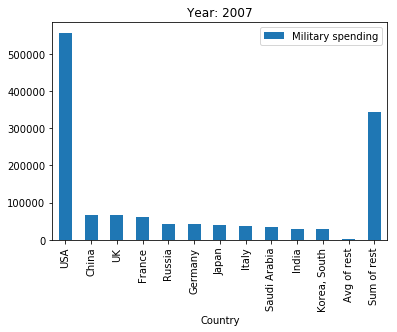

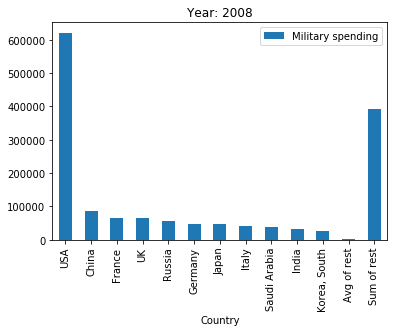

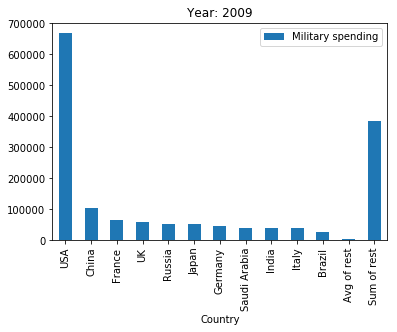

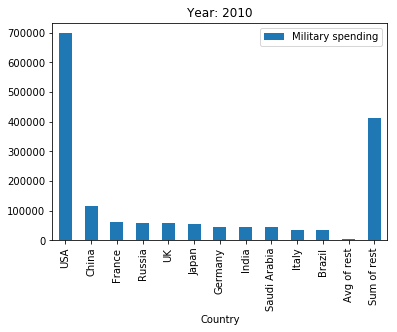

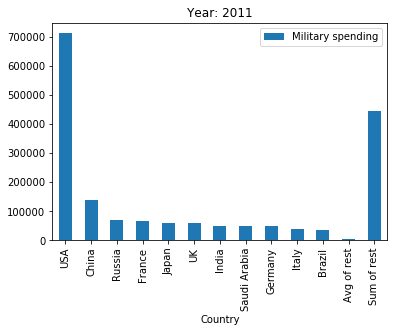

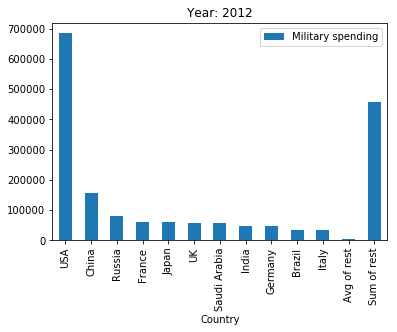

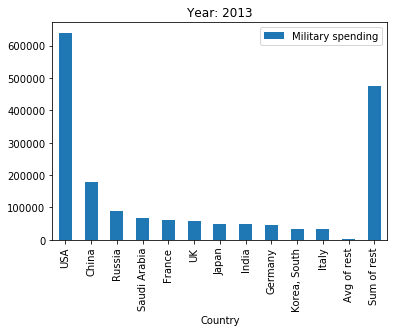

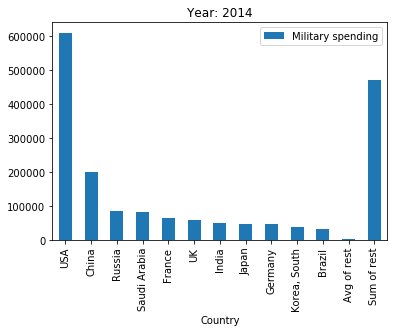

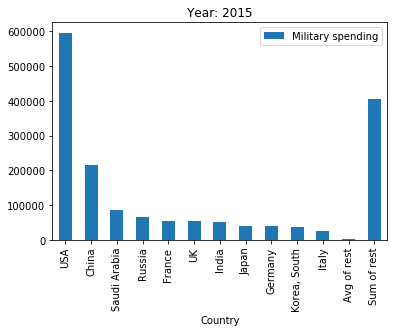

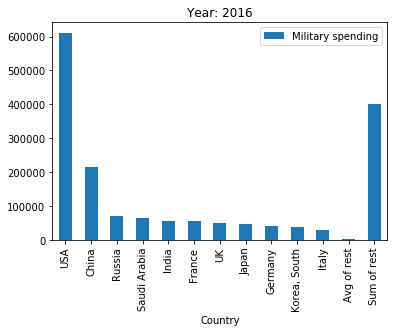

In [14]:
# Comparing the Military spending of top ten countries for 10 years and with the military spending of rest of the
# countries also comparing the average military spending of the rest of countries
for i in range(2007,2017):
    top_10 = sorted_data[i].nlargest(11,'Military spending')
    top_10.loc['Avg of rest'] = avg_of_rest[i]
    top_10.loc['Sum of rest'] = sum_of_rest[i]
    top_10[['Military spending']].plot.bar(title='Year: %d'%i)
    plt.show()

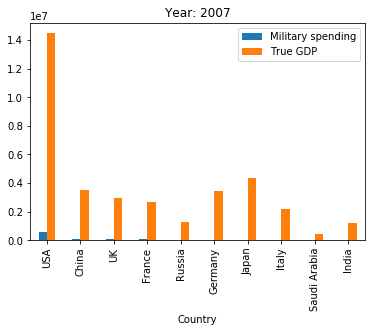

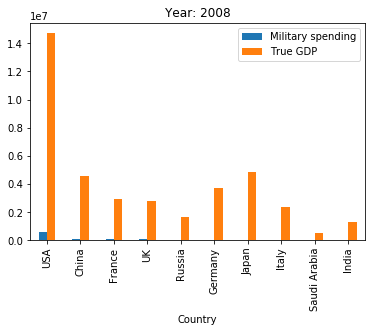

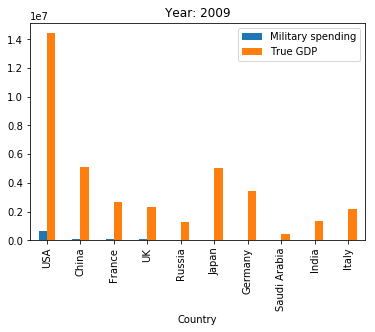

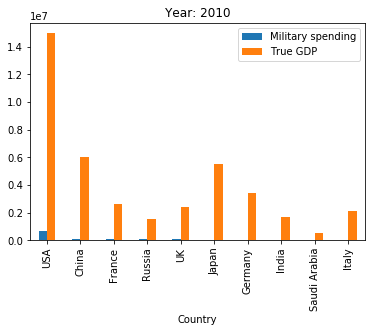

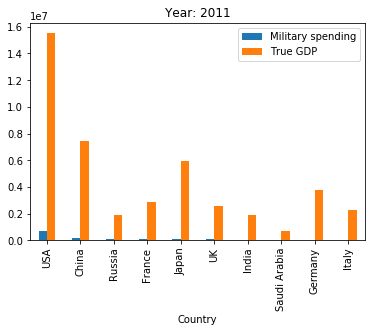

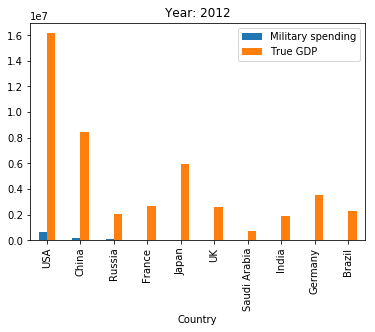

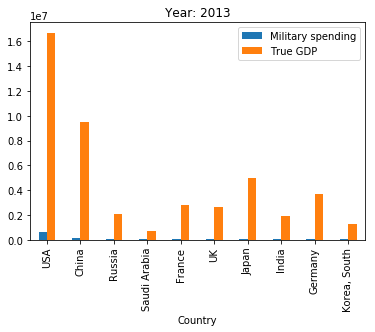

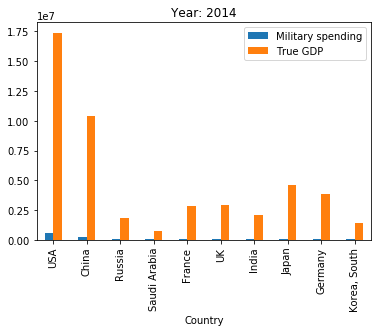

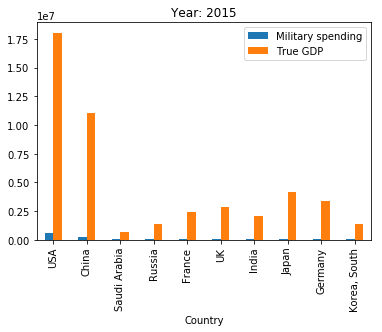

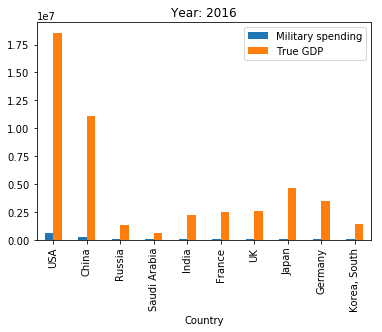

In [15]:
# Since our data has given Military expenditure by country as percentage of GDP, we calculate and add a True GDP column in US dollar absolute value
# Add true gdp column only to the top 10 countries to compare the data to that country’s GDP

for i in range(2007,2017):
    top_10 = sorted_data[i].nlargest(10,'Military spending')
    top_10['True GDP'] = top_10['Military spending']/top_10['MS_GDP']
    top_10[['Military spending','True GDP']].plot.bar(title='Year: %d'%i)
    #print(top_10)
    plt.show()
        

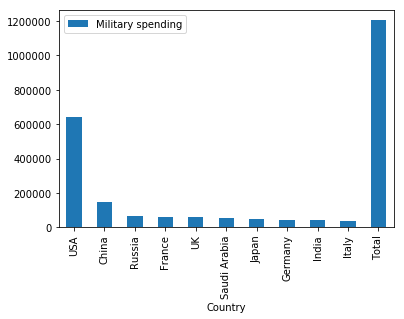

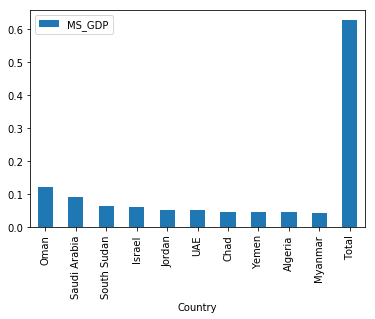

In [16]:
# Comparing military spending with the share of GDP for top 10 countries

nh=data[['Military spending']].groupby('Country').mean().sort_values(by='Military spending',ascending=False)[:10]
nh=nh.transpose()
g=['China','Russia','France','UK','Saudi Arabia','Japan','Germany','India','Italy']
nh['Total']=nh['USA']
for i in g:
    nh['Total']=nh['Total']+nh[i]

nh.transpose().plot.bar()
data
#data['MS_GDP']=data['MS_GDP']*100
data
nh1=data[['MS_GDP']].groupby('Country').mean().sort_values(by='MS_GDP',ascending=False)[:10]
nh1=nh1.transpose()
nh1
g1=['Saudi Arabia','South Sudan','Israel','Jordan','UAE','Chad','Yemen','Algeria','Myanmar']
nh1['Total']=nh1['Oman']
nh1
for i in g1:
     nh1['Total']=nh1['Total']+nh1[i]

nh1.transpose().plot.bar()
plt.show()


In [17]:
# Comparing the top 10 countries military spending to their True GDP
#top_10[['Military spending','True GDP']].plot.bar(title='Year: %d'%i)
#plt.show()  

In [18]:
# Since our data have only given Military expenditure by country as percentage of GDP as a 'MS_GDP' column so, 
# We calculate GDPperCapita 
# Comparing the per person military spending to the per person GDP that is comparing GDPperCapita with Percapita Military spending
# Comparing the per person military spending to the per person GDP of 145 countries

for i in range(2007,2017):
    sorted_data[i]['GDPperCapita'] = sorted_data[i]['Percapita_MS']/(sorted_data[i]['MS_GDP'])
    sorted_data[i] = sorted_data[i].sort_values(by='GDPperCapita', ascending=True)
    sorted_data[i][['GDPperCapita','Percapita_MS']].plot.line(x='GDPperCapita', y= 'Percapita_MS',title='Year: %d'%i)
    print(sorted_data[i])
    


                      Military spending    MS_GDP  Percapita_MS   GDPperCapita
Country                                                                       
Burundi                       46.308706  0.034146      5.438755     159.279540
Liberia                        3.486000  0.004717      0.989684     209.811611
Congo, Dem. Rep.             205.217223  0.012549      3.429726     273.301738
Ethiopia                     360.140309  0.015366      4.452115     289.747311
Malawi                        33.599606  0.007580      2.489159     328.405946
Afghanistan                  219.580214  0.025663      8.485358     330.649727
Madagascar                    81.936944  0.011159      4.229870     379.065669
Sierra Leone                  29.076876  0.013672      5.393488     394.478344
Tanzania                     166.215543  0.009879      4.003071     405.218484
Uganda                       252.119246  0.020485      8.406228     410.360910
Mozambique                    68.625364  0.007327   

                      Military spending    MS_GDP  Percapita_MS   GDPperCapita
Country                                                                       
Cuba                          94.277533  0.033269      8.337144     250.601280
Liberia                        8.458000  0.006543      2.136943     326.604438
Niger                         66.889841  0.011697      4.105689     351.006714
Ethiopia                     303.617033  0.009744      3.467459     355.867199
Congo, Dem. Rep.             183.682098  0.007337      2.785649     379.658493
Madagascar                    56.922893  0.006520      2.700387     414.142106
Mozambique                    99.189932  0.009768      4.078289     417.501296
Sierra Leone                  25.062279  0.009721      4.339111     446.362629
Malawi                        49.984218  0.007164      3.384212     472.405553
Central African Rep.          51.585275  0.024504     11.605307     473.612071
Uganda                       608.685869  0.037969   

                  Military spending    MS_GDP  Percapita_MS   GDPperCapita
Country                                                                   
Burundi                   60.859500  0.024824      5.814995     234.247678
Cuba                     119.383260  0.035127     10.506773     299.105726
Malawi                    68.597749  0.013330      4.237011     317.863574
Niger                    106.064286  0.013832      5.777280     417.670199
Liberia                   15.111500  0.007763      3.519465     453.339457
Madagascar                71.877874  0.006780      3.135410     462.460453
Gambia                    10.378891  0.011645      5.559491     477.398754
Ethiopia                 345.064166  0.007313      3.649218     499.037804
Guinea                   196.818706  0.031636     16.471941     520.673889
Congo, Dem. Rep.         374.475561  0.009313      5.161417     554.215454
Uganda                   432.701043  0.020142     11.831036     587.392657
Togo                     

                  Military spending    MS_GDP  Percapita_MS   GDPperCapita
Country                                                                   
Burundi                   66.462843  0.022632      5.751639     254.132256
South Sudan              137.530256  0.037057     10.792992     291.256479
Malawi                    33.649378  0.006178      1.895536     306.823513
Niger                    166.192292  0.022192      8.024254     361.581763
Mozambique               112.203469  0.010359      3.898894     376.383637
Madagascar                59.284836  0.005933      2.377980     400.832187
Liberia                   12.258500  0.005602      2.654105     473.781489
Guinea                   161.856744  0.024928     12.489806     501.044123
Uganda                   403.111947  0.018835      9.991917     530.501622
Afghanistan              173.598862  0.009555      5.187639     542.899413
Sierra Leone              26.797252  0.007183      4.060870     565.335404
Congo, Dem. Rep.         

In [19]:
sorted_data[i].corr()

,Military spending,MS_GDP,Percapita_MS,GDPperCapita
Military spending,1.000000,0.112907,0.396426,0.224945
MS_GDP,0.112907,1.000000,0.576359,-0.073744
Percapita_MS,0.396426,0.576359,1.000000,0.556018
GDPperCapita,0.224945,-0.073744,0.556018,1.000000


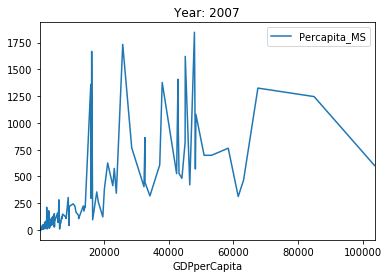

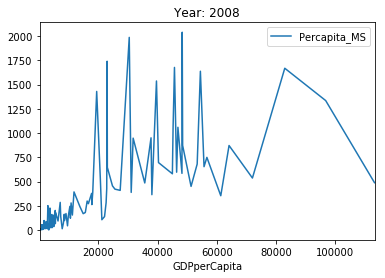

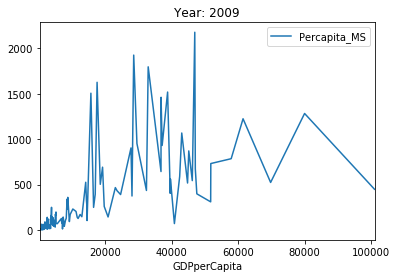

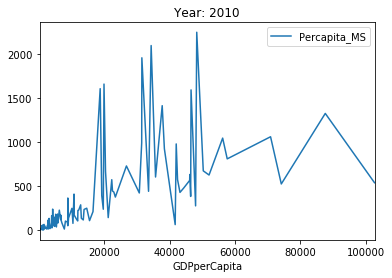

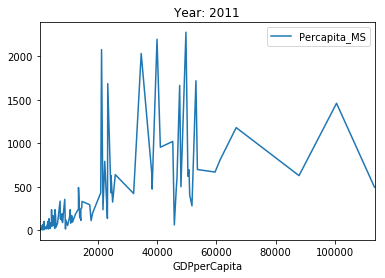

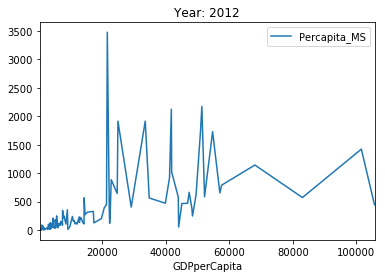

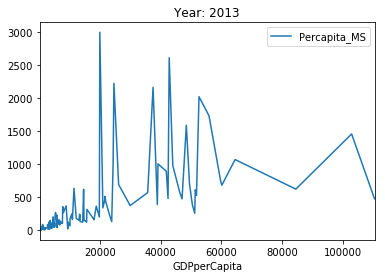

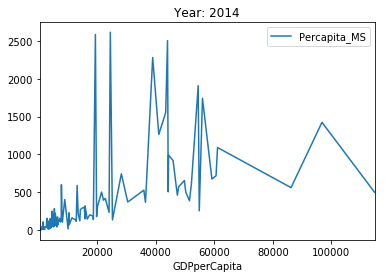

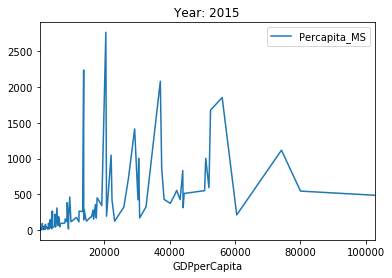

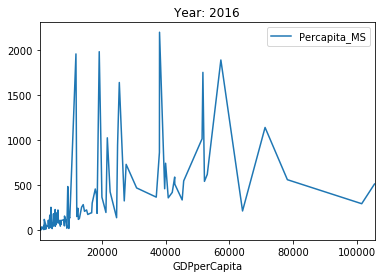

In [20]:
#Showing the plot for GDPperCapita and military spending per capita
plt.show()

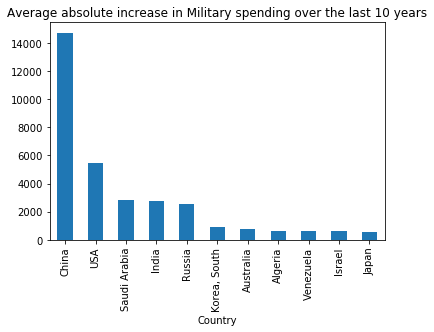

In [21]:
#Single out the fastest growing countries in military spending in fixed value 

# Calculate the Average Increase in Military spending 

final_data = sorted_data[2007]

def avg_abs_inc(ms):
    try:
        difference = sorted_data[2016].loc[ms.name]['Military spending']-sorted_data[2007].loc[ms.name]['Military spending']
    except KeyError:
        difference = 0
    avg_difference = difference/10
    return avg_difference

final_data['avg_abs_inc'] = final_data.apply(avg_abs_inc,axis=1)
top_10_abs_inc = final_data.nlargest(11,'avg_abs_inc')
top_10_abs_inc['avg_abs_inc'].plot.bar(title="Average absolute increase in Military spending over the last 10 years")
plt.show()


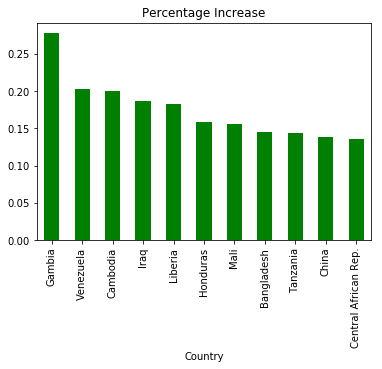

In [22]:
#Single out the fastest growing countries in military spending in percentage

def avg_percentage_inc(ms):

    sum = 0
    for i in range(2008,2017):
        try:
            difference = sorted_data[i].loc[ms.name]['Military spending']-sorted_data[i-1].loc[ms.name]['Military spending']
            pecentage_dff = difference/sorted_data[i-1].loc[ms.name]['Military spending']
        except KeyError:
            pecentage_dff = 0
        sum += pecentage_dff

    avg_percentage_inc = sum/9

    return avg_percentage_inc

final_data['avg_percentage_inc'] = final_data.apply(avg_percentage_inc,axis=1)
top_10_percentage_inc = final_data.nlargest(11,'avg_percentage_inc')
top_10_percentage_inc['avg_percentage_inc'].plot.bar(title="Percentage Increase", color= 'green')
plt.show()